In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns 
import datetime 
import yfinance as yf
from scipy.interpolate import interp1d 
from scipy.stats import linregress 
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read CSV data file into DataFrame
raw_df = pd.read_csv("stock_details_5_years.csv")

In [3]:
raw_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


In [4]:
# Examine the columns of the data
raw_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company'],
      dtype='object')

In [5]:
# Check for unique values in each column  
raw_df.nunique()

Date              1258
Open            510592
High            514315
Low             513389
Close           484353
Volume          170929
Dividends          960
Stock Splits        40
Company            491
dtype: int64

In [6]:
# Check the number of null values in each column
raw_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

In [7]:
# check number of records where the value is equal to 0
raw_df.eq(0).sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume             331
Dividends       596105
Stock Splits    602891
Company              0
dtype: int64

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


In [9]:
raw_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000


### Lets ask the user to input their protfolio of stock holdings

In [10]:
tickers = ['AAPL', 'NVDA', 'MSFT', 'INTC', 'TSLA', 'CSCO']

In [12]:
df_portfolio = raw_df.query('Company in @tickers')

In [13]:
df_portfolio['Date'] = pd.to_datetime(df_portfolio['Date'])
#start_date = "2018-11-01"
#end_date = "2023-11-01"

Text(0, 0.5, 'Closing Price')

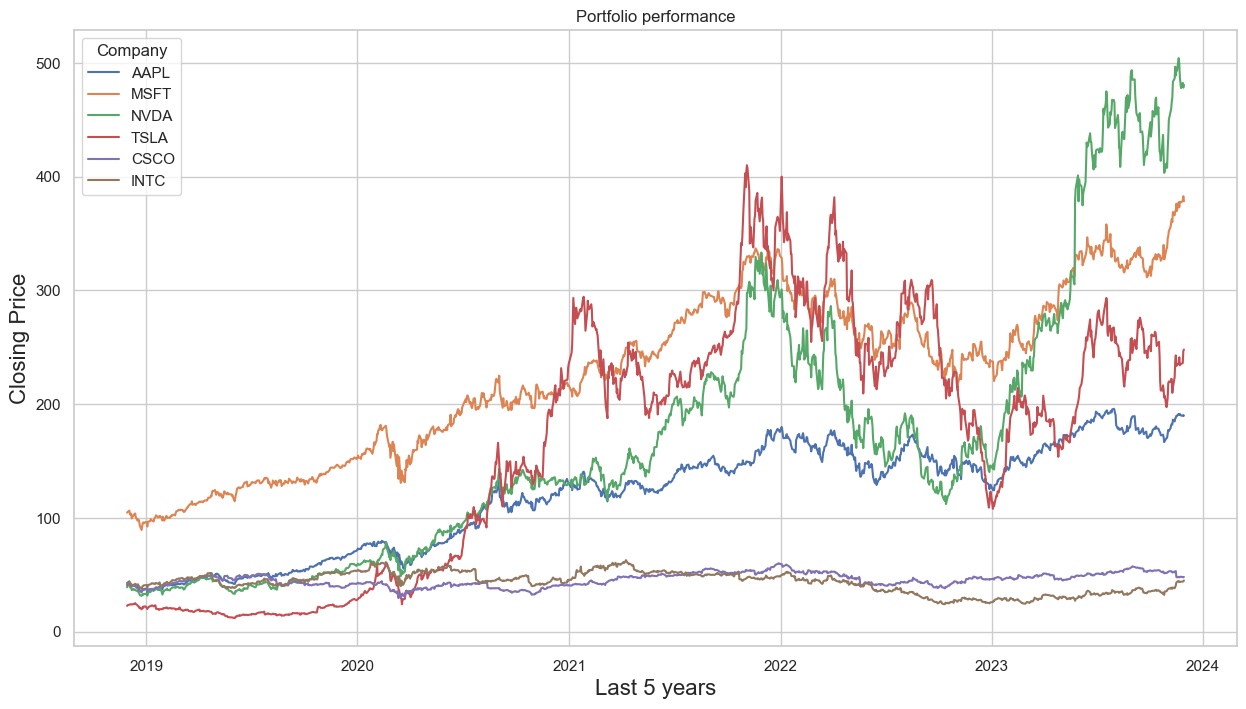

In [14]:
# Visualize the stock portfolio performance of holding
fig, visual_plot = plt.subplots(figsize=(15,8))
visual_plot = sns.lineplot(data=df_portfolio, x=df_portfolio['Date'], y=df_portfolio['Close'],hue=df_portfolio['Company'])
visual_plot.set_title("Portfolio performance")
visual_plot.set_xlabel('Last 5 years', fontsize=16)
visual_plot.set_ylabel('Closing Price' , fontsize=16)

### Using ARIMA from statsmodels to train and forecast MSFT

In [15]:
msft_df = raw_df[raw_df['Company'] == 'MSFT'].copy()
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
#msft_df = msft_df.set_index('Date')

In [16]:
msft_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.0,0.0,MSFT
459,2018-11-30 00:00:00-05:00,105.120371,105.376766,103.847914,105.300797,33665600,0.0,0.0,MSFT
917,2018-12-03 00:00:00-05:00,107.304460,107.703289,105.148878,106.440323,34732800,0.0,0.0,MSFT
1375,2018-12-04 00:00:00-05:00,106.297913,106.962628,102.755913,103.050285,45197000,0.0,0.0,MSFT
1833,2018-12-06 00:00:00-05:00,100.486371,103.733991,99.707701,103.686516,49107400,0.0,0.0,MSFT
...,...,...,...,...,...,...,...,...,...
600508,2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,0.0,0.0,MSFT
600999,2023-11-24 00:00:00-05:00,377.329987,377.970001,375.140015,377.429993,10176600,0.0,0.0,MSFT
601490,2023-11-27 00:00:00-05:00,376.779999,380.640015,376.200012,378.609985,22179200,0.0,0.0,MSFT
601981,2023-11-28 00:00:00-05:00,378.350006,383.000000,378.160004,382.700012,20429400,0.0,0.0,MSFT


In [17]:
## Lets consider only closing price at end of each day
msft_df = msft_df[['Close']]

In [18]:
## Train and Test split for Arima
X_train, X_test = msft_df.iloc[:-300], msft_df.iloc[-300:]
y_hist, y_future = msft_df.iloc[:-300], msft_df.iloc[-300:]

<Axes: >

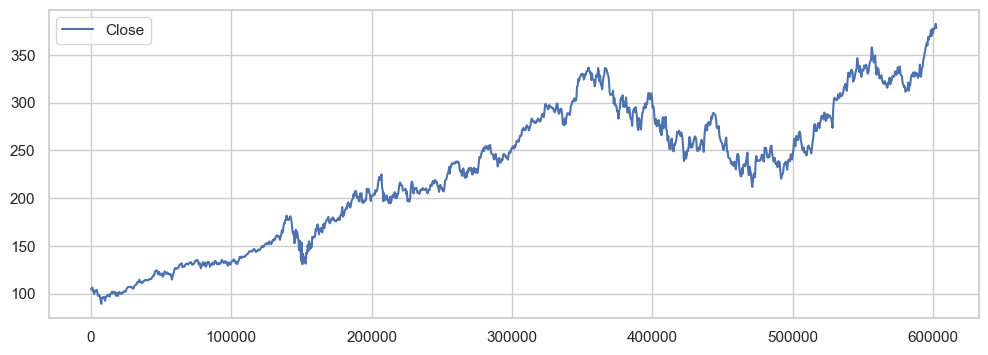

In [19]:
## Historic closing price for MSFT
msft_df.plot(figsize=(12,4))

In [20]:
X_train_sd = seasonal_decompose(X_train,'additive', period = 30 )

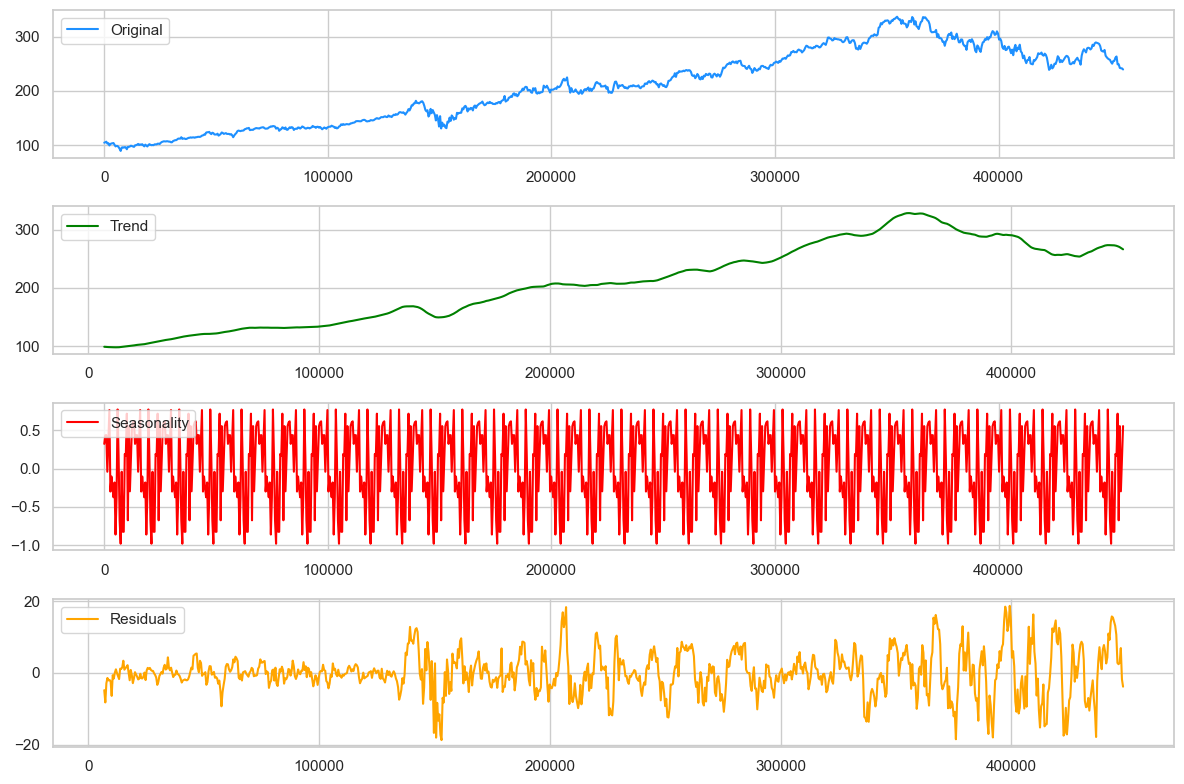

In [21]:
# get the trend, seasonality and noise 
trend = X_train_sd.trend
seasonal = X_train_sd.seasonal
residual = X_train_sd.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(X_train, label='Original', color="dodgerblue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="green")
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="red")
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="orange")
plt.legend(loc='best')
plt.tight_layout()

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000')])

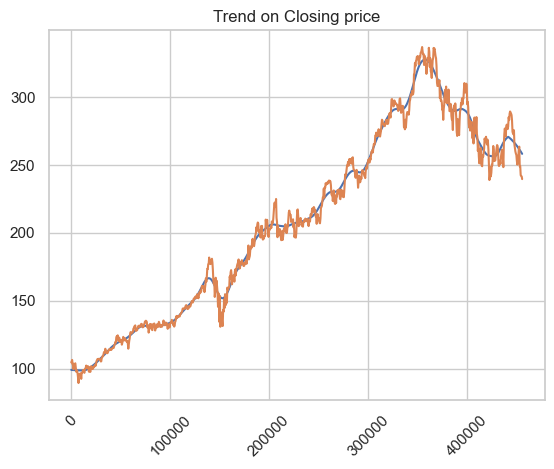

In [22]:
# Model-based forecasting using STL to remove seasonality
stl = STL(y_hist['Close'], period = 30)
results = stl.fit()
plt.plot(results.trend)
plt.plot(y_hist)
plt.title('Trend on Closing price')
plt.xticks(rotation=45)

In [23]:
# Instantiate STLF for forecasting
stlf = STLForecast(y_hist['Close'], ARIMA, period=30,model_kwargs={'order':(1, 1, 0), 'trend':"t"})
# Fit model using historical data
stlf_results = stlf.fit()
# Produce forecast for future data
stlf_forecast = stlf_results.forecast(len(y_future))

In [24]:
## Forecast convert to DataFrame
ds_stlf_forecast = pd.DataFrame(stlf_forecast, columns=['Close']) 
index = (y_future[:len(y_future)].index)
ds_stlf_forecast.index = index

In [25]:
## Calculating RMSE for MSFT
msft_rmse_1 = np.sqrt(np.mean((ds_stlf_forecast - y_future) ** 2))
msft_rmse_1

38.81098584427978

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000')])

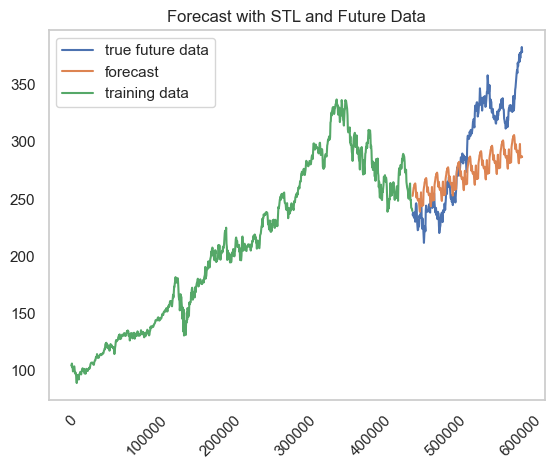

In [26]:
plt.plot(y_future, label = 'true future data')
plt.plot(ds_stlf_forecast, label = 'forecast')
plt.plot(y_hist, label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();
plt.xticks(rotation=45)

### Optimizing the ARIMA Model using pmdarima

In [27]:
msft_df2 = raw_df[raw_df['Company'] == 'MSFT'].copy()

In [28]:
msft_size = int(len(msft_df2) * 0.95)
msft_train = (msft_df2['Close'])[:msft_size]
msft_test = (msft_df2['Close'])[msft_size:]

In [29]:
msft_model = pm.auto_arima(msft_train, test = 'adf', 
                        start_p = 1, start_q = 1,     
                        max_p = 3, max_q = 3,
                        d = None, seasonal = True,   
                        start_P = 0, m = 3,
                        trace = True, error_action = 'ignore',  
                        suppress_warnings = True, stepwise = True,
                        D = 1, information_criterion = 'aic')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=7984.767, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=7251.481, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=7512.308, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=7990.520, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=7467.916, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[3] intercept   : AIC=7042.862, Time=0.19 sec
 ARIMA(1,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(2,1,0)[3] intercept   : AIC=7973.068, Time=0.11 sec
 ARIMA(2,0,0)(2,1,0)[3] intercept   : AIC=7043.746, Time=0.30 sec
 ARIMA(1,0,1)(2,1,0)[3] intercept   : AIC=7043.901, Time=0.25 sec
 ARIMA(0,0,1)(2,1,0)[3] intercept   : AIC=7500.814, Time=0.16 sec
 ARIMA(2,0,1)(2,1,0)[3] intercept   : AIC=7046.326, Time=0.87 sec
 ARIMA(1,0,0)(2,1,0)[3]             : AIC=7043.2

In [30]:
# Forecasting using pmdarima
msft_forecast = msft_model.predict(X = msft_test, n_periods = len(msft_test))

In [31]:
msft_forecast_ds = pd.Series(msft_forecast) 
index = (msft_test[:len(msft_test)].index)
msft_forecast_ds.index = index

In [32]:
## Calculating RMSE for MSFT
msft_rmse = np.sqrt(np.mean((msft_forecast_ds - msft_test) ** 2))
msft_rmse

18.55815912772174

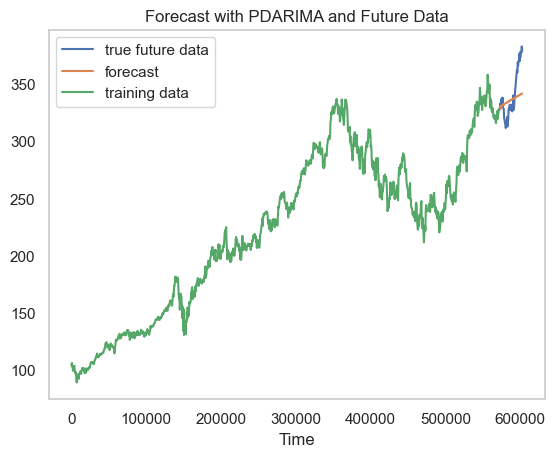

In [33]:
plt.plot(msft_test, label = 'true future data')
plt.plot(msft_forecast_ds, label = 'forecast')
plt.plot(msft_train, label = 'training data')
plt.legend()
plt.title('Forecast with PDARIMA and Future Data')
plt.xlabel('Time')
plt.grid();

### Comparing RMSE between ARIMA and PDARIMA. PDARIMA performs better. 

In [34]:
## Defining a function to perform predication using PDARIMA
